In [8]:
# DATA FOR PUBLIC CASES
# the main libraries used in the project
import pandas as pd


# Load the dataset
publicData = pd.read_json("../data/public_cases.json")

#flatten the nested input in -> columns  df=data frame, the 2d table  publicData is the public_cases.json data that is being processed
df = pd.json_normalize(publicData["input"])
df["expected_output"] = publicData["expected_output"]

df.head()


,trip_duration_days,miles_traveled,total_receipts_amount,expected_output
0,3,93.0,1.42,364.51
1,1,55.0,3.60,126.06
2,1,47.0,17.97,128.91
3,2,13.0,4.67,203.52
4,3,88.0,5.78,380.37


In [9]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_duration_days     1000 non-null   int64  
 1   miles_traveled         1000 non-null   float64
 2   total_receipts_amount  1000 non-null   float64
 3   expected_output        1000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


,trip_duration_days,miles_traveled,total_receipts_amount,expected_output
count,1000.000000,1000.00000,1000.00000,1000.000000
mean,7.043000,597.41374,1211.05687,1349.114030
std,3.926139,351.29979,742.85418,470.316464
min,1.000000,5.00000,1.42000,117.240000
25%,4.000000,275.96000,530.37750,1019.297500
50%,7.000000,621.00000,1171.90000,1454.260000
75%,10.000000,893.00000,1881.10500,1711.122500
max,14.000000,1317.07000,2503.46000,2337.730000


In [10]:

privateData = pd.read_json("../data/private_cases.json")



df_private = pd.DataFrame(privateData)
df_private.head()



,trip_duration_days,miles_traveled,total_receipts_amount
0,3,191.0,21.87
1,1,81.0,3.93
2,3,204.0,16.76
3,1,64.0,22.47
4,3,204.0,22.19


In [11]:
df_private.info()
df_private.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_duration_days     5000 non-null   int64  
 1   miles_traveled         5000 non-null   float64
 2   total_receipts_amount  5000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


,trip_duration_days,miles_traveled,total_receipts_amount
count,5000.000000,5000.000000,5000.000000
mean,7.199800,589.076406,1186.129164
std,3.998034,346.673720,719.695557
min,1.000000,5.000000,0.270000
25%,4.000000,281.000000,567.845000
50%,7.000000,588.000000,1154.810000
75%,11.000000,886.000000,1796.487500
max,14.000000,1348.590000,2502.710000


In [13]:
def check_data_quality(df, name="Dataset", has_output=False):
    print(f"checking data quality for : {name}")
    print("-"*60)

    #1 missing values
    print("\n missing values:")
    print(df.isna().sum())

    #2 duplicates
    duplicate_count = df.duplicated().sum()
    print(f"duplicates count: {duplicate_count}")

    #data types
    print("\n data types")
    print(df.dtypes)

    #Basic statistics
    print("\n statistic summary:")
    print(df.describe())

    #validate ranges
    print("\n range validation")
    if(df["trip_duration_days"] <= 0).any():
        print("trip_duration_days contains non positive values")

    else:
        print("trip_duration_days is valid")

    #miles traveled

    if(df["miles_traveled"] <= 0).any():
        print("miles_traveled contains non positive values")

    else:
        print("miles_traveled is valid")
    #total_receipts_amount
    if(df["total_receipts_amount"] <= 0).any():
        print("total_receipts_amount contains non positive values")

    else:
        print("total_receipts_amount is valid")

    #expected_output (public data only
    if has_output and "expected_output" in df.columns:
        if (df['expected_output']<=0).any():
            print("expected_output contains non positive values")
        else:
            print("expected_output is valid")

    print("-"*60)

In [14]:
check_data_quality(df, "public_cases", has_output=True)
check_data_quality(df, "private_cases", has_output=False)

checking data quality for : public_cases
------------------------------------------------------------

 missing values:
trip_duration_days       0
miles_traveled           0
total_receipts_amount    0
expected_output          0
dtype: int64
duplicates count: 0

 data types
trip_duration_days         int64
miles_traveled           float64
total_receipts_amount    float64
expected_output          float64
dtype: object

 statistic summary:
       trip_duration_days  miles_traveled  total_receipts_amount  \
count         1000.000000      1000.00000             1000.00000   
mean             7.043000       597.41374             1211.05687   
std              3.926139       351.29979              742.85418   
min              1.000000         5.00000                1.42000   
25%              4.000000       275.96000              530.37750   
50%              7.000000       621.00000             1171.90000   
75%             10.000000       893.00000             1881.10500   
max            

In [44]:
#data visualization

import matplotlib.pyplot as plt
import seaborn as sns

#set the style of the graphs
sns.set_theme(style="darkgrid", palette="muted")

#funtion for displaying ditribution of cols in dataframe df
def plot_distro(df, cols, bins=30):
    """Histogram + KDE for each numeric column in cols."""
    for col in cols:
        if col not in df.columns:
            print(f"[skip] {col} not in df")
            continue
        plt.figure(figsize=(6,4))
        #make plot
        sns.histplot(df[col], kde=True, bins=bins, edgecolor="black")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col); plt.ylabel("Frequency")
        plt.tight_layout(); plt.show()

#functin for displaying Boxpot of input dataframe for the features cols
def plot_boxplot(df, cols):
    """Boxplot for each numeric column in cols."""
    for col in cols:
        if col not in df.columns:
            print(f"[skip] {col} not in df")
            return
        plt.figure(figsize=(6,4))
        #make plot
        sns.boxplot(df[col], orient="h")
        plt.title(f"Boxplot for {col}")
        plt.tight_layout(); plt.show()

def plot_heatmap(df, cols):
    """Correlation heatmap for selected numeric columns."""
    valid_cols = [c for c in cols if c in df.columns]
    if len(valid_cols) < 2:
        print("[warn] Need at least two numeric columns for a heatmap")
        return
    plt.figure(figsize=(7,5))
    corr = df[valid_cols].corr()
    sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()
def plot_pairwise(df, cols):
    """Pairplot to visualize pairwise feature relationships."""
    sns.pairplot(df[cols], diag_kind="kde", corner=True)
    plt.suptitle("Pairwise Relationships Among Numeric Features", y=1.02)
    plt.show()


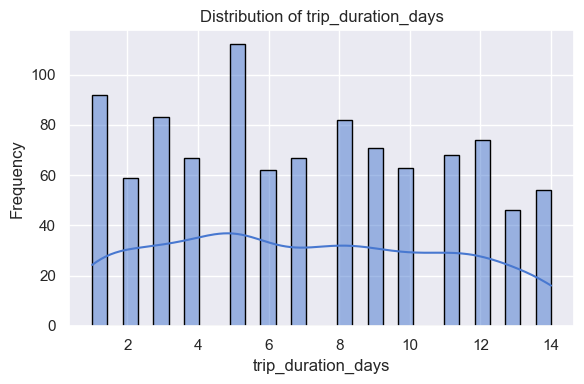

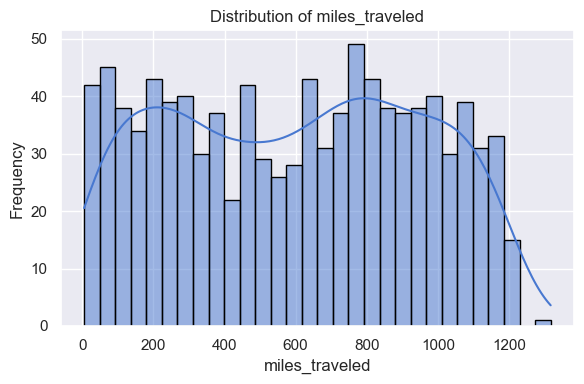

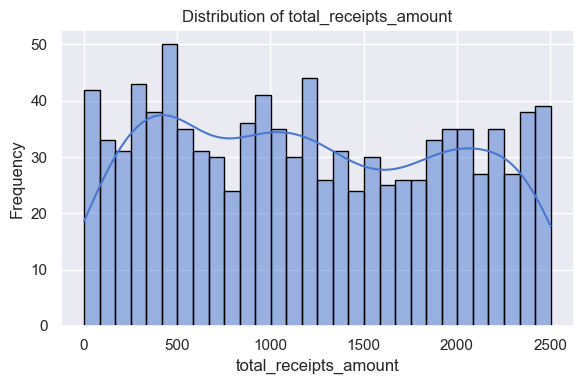

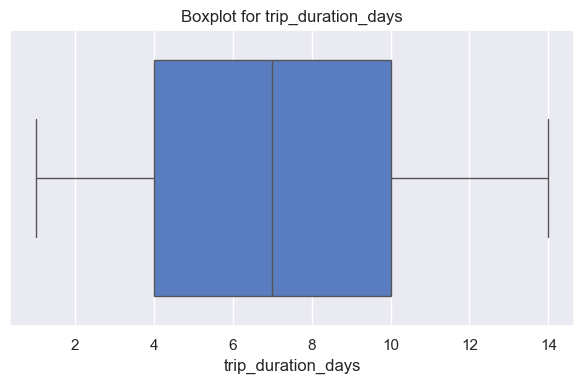

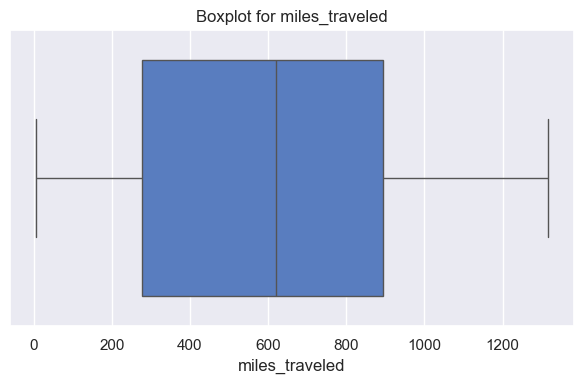

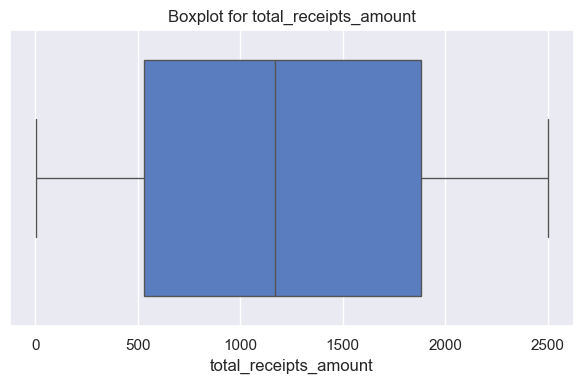

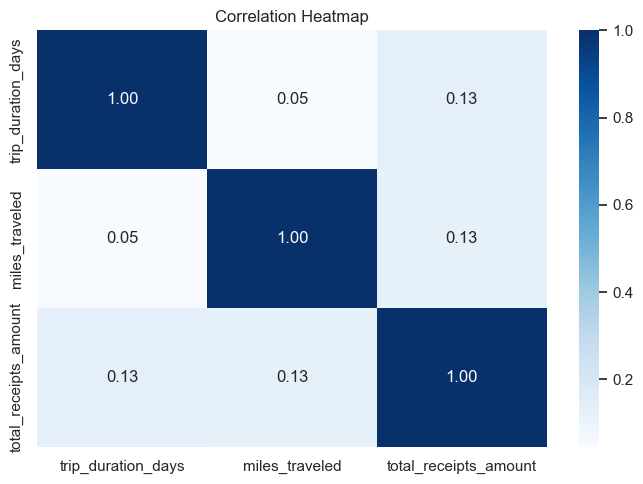

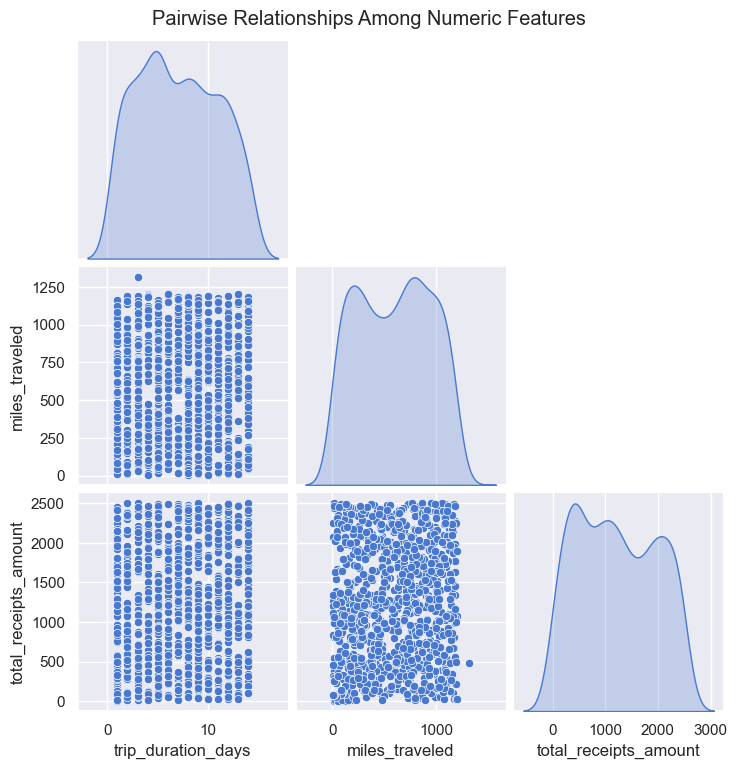


DF_PRIVATE GRAPHS



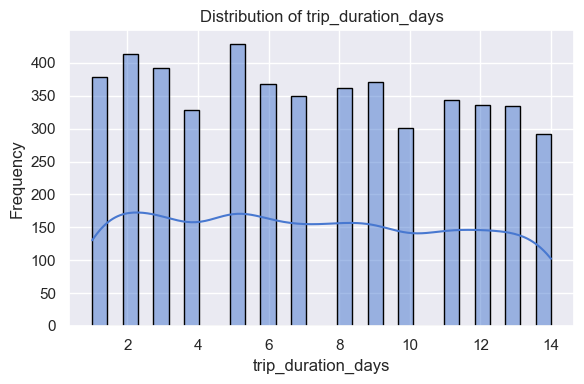

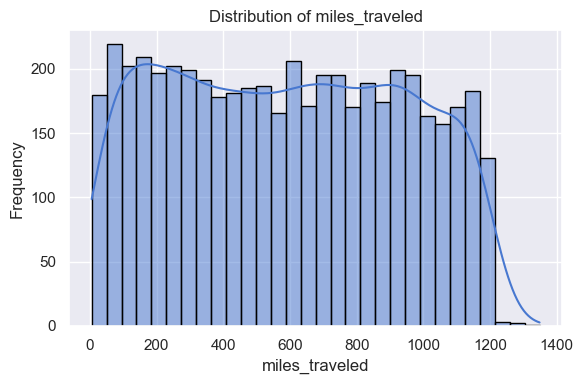

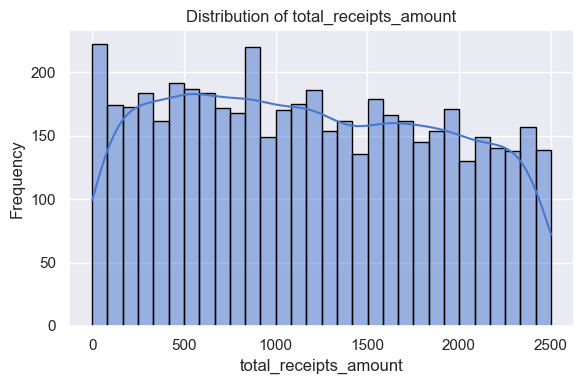

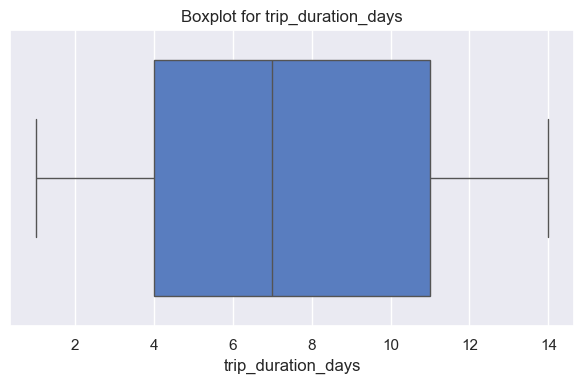

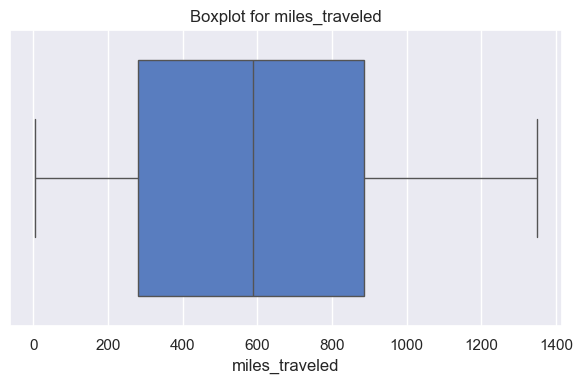

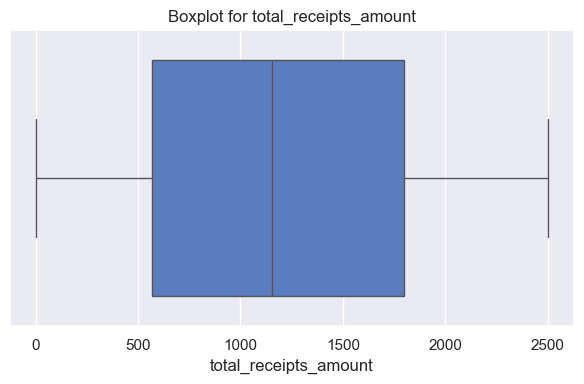

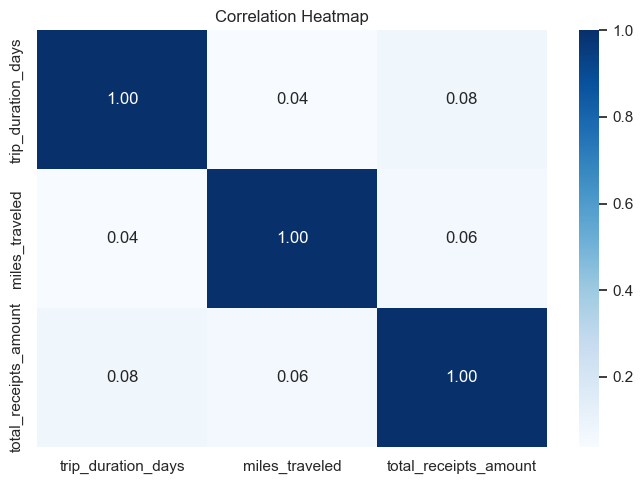

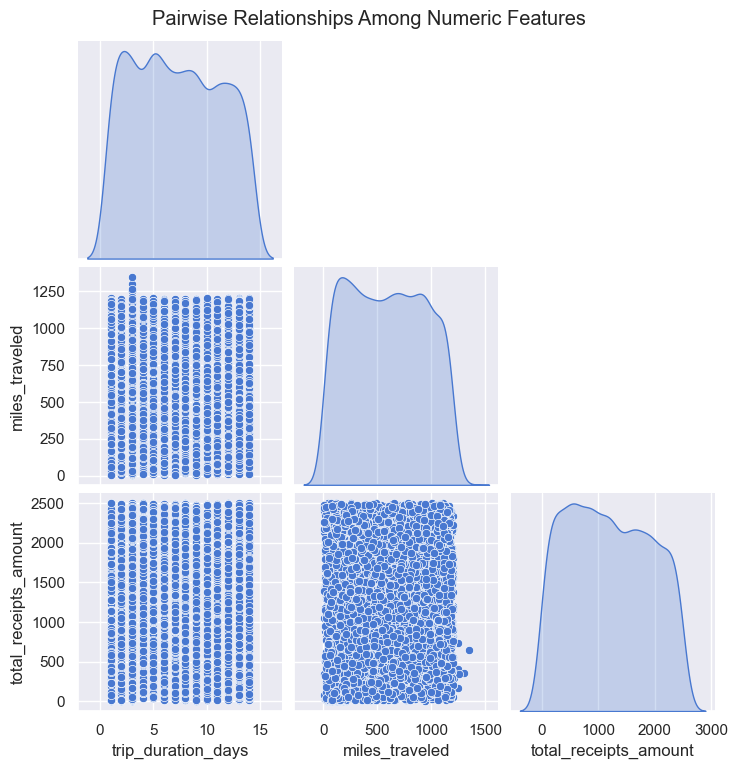

In [45]:
num_cols = ["trip_duration_days", "miles_traveled", "total_receipts_amount"]
plot_distro(df, num_cols)
plot_boxplot(df, num_cols)
plot_heatmap(df, num_cols)
plot_pairwise(df, num_cols)

print("\nDF_PRIVATE GRAPHS\n")
plot_distro(df_private, num_cols)
plot_boxplot(df_private, num_cols)
plot_heatmap(df_private, num_cols)
plot_pairwise(df_private, num_cols)


Some sqew right for total receipts but it matches the public so it seems fine.

In [46]:
def detect_outliers_iqr(df, cols):
    """Detect outliers using IQR rule; returns a summary DataFrame."""
    outlier_summary = []
    for col in cols:
        if col not in df.columns:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask = (df[col] < lower) | (df[col] > upper)
        n_out = mask.sum()
        pct = (n_out / len(df)) * 100
        outlier_summary.append({
            "feature": col,
            "lower_bound": lower,
            "upper_bound": upper,
            "outliers": n_out,
            "outlier_%": round(pct, 2)
        })
    return pd.DataFrame(outlier_summary)

In [49]:
#IQR outliers for public
num_cols = ["trip_duration_days", "miles_traveled", "total_receipts_amount", "expected_output"]
iqr_results = detect_outliers_iqr(df, num_cols)
print(iqr_results)
#IQR outliers for Private
num_cols = ["trip_duration_days", "miles_traveled", "total_receipts_amount", "expected_output"]
iqr_results = detect_outliers_iqr(df_private, num_cols)
print(iqr_results)


                 feature  lower_bound  upper_bound  outliers  outlier_%
0     trip_duration_days     -5.00000     19.00000         0        0.0
1         miles_traveled   -649.60000   1818.56000         0        0.0
2  total_receipts_amount  -1495.71375   3907.19625         0        0.0
3        expected_output    -18.44000   2748.86000         0        0.0
                 feature  lower_bound  upper_bound  outliers  outlier_%
0     trip_duration_days     -6.50000     21.50000         0        0.0
1         miles_traveled   -626.50000   1793.50000         0        0.0
2  total_receipts_amount  -1275.11875   3639.45125         0        0.0


###OUTLIER detection
outliers were checked with IQR rule
